In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Question 1 Starts here

In [2]:
df = pd.read_csv('Q1_Pandas.csv')

In [3]:
df[df["price"]==df["price"].max()]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400.0


In [4]:
df[df['company']=='toyota']

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,66,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
49,67,toyota,hatchback,95.7,158.7,ohc,four,62,31,6338.0
50,68,toyota,hatchback,95.7,158.7,ohc,four,62,31,6488.0
51,69,toyota,wagon,95.7,169.7,ohc,four,62,31,6918.0
52,70,toyota,wagon,95.7,169.7,ohc,four,62,27,7898.0
53,71,toyota,wagon,95.7,169.7,ohc,four,62,27,8778.0
54,79,toyota,wagon,104.5,187.8,dohc,six,156,19,15750.0


In [5]:
temp = pd.DataFrame(df.groupby('company')['price'].max())
temp

,price
company,
alfa-romero,16500.0
audi,18920.0
bmw,41315.0
chevrolet,6575.0
dodge,6377.0
honda,12945.0
isuzu,6785.0
jaguar,36000.0
mazda,18344.0


In [6]:
temp = pd.DataFrame(df.groupby('company')['average-mileage'].mean())
temp

,average-mileage
company,
alfa-romero,20.333333
audi,20.000000
bmw,19.000000
chevrolet,41.000000
dodge,31.000000
honda,26.333333
isuzu,33.333333
jaguar,14.333333
mazda,28.000000


## Question 2 Starts here

In [7]:
df = pd.read_csv('Q2_Matplotlib.csv')

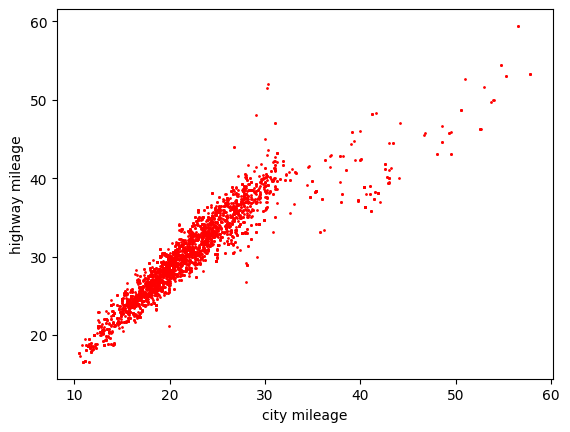

In [8]:
'''
relation between city and highway mileage
'''
plt.scatter(df['city'],df['highway']
            ,c='red',marker='o',s=1)
plt.xlabel('city mileage')
plt.ylabel('highway mileage')
plt.show()

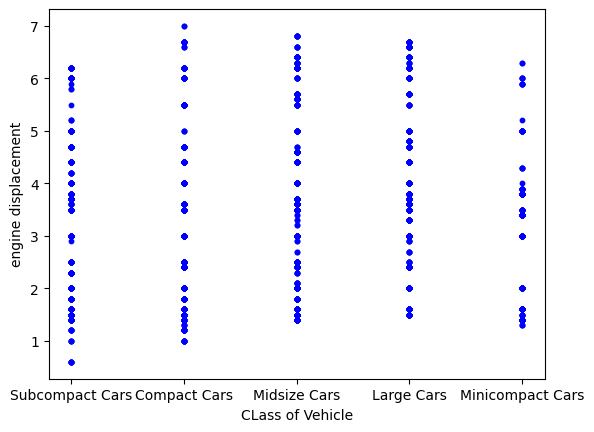

In [9]:
'''
What is the relationship between the size of a car and the size of its engine? Show the relationship using a plot
'''
plt.scatter(df['VClass'],df['displ'],c='blue',marker='o',s=10)
plt.xlabel('CLass of Vehicle')
plt.ylabel('engine displacement')
plt.show()

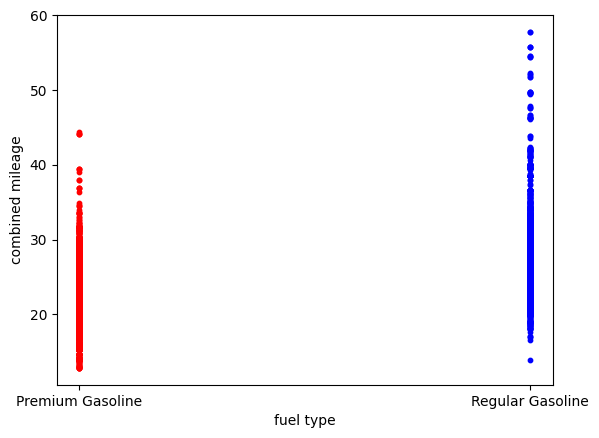

In [10]:
'''rpremium or regular gas and mileage of car'''
temp1 = df[df['fuelType']=='Premium Gasoline']
temp2 = df[df['fuelType']=='Regular Gasoline']
plt.scatter(temp1['fuelType'],temp1['comb'],c='red',marker='o',s=10)
plt.scatter(temp2['fuelType'],temp2['comb'],c='blue',marker='o',s=10)
plt.xlabel('fuel type')
plt.ylabel('combined mileage')
plt.show()

## Question 3 Starts here

In [11]:
df = pd.read_csv('Q3_Scikit.csv')

In [12]:
# dropping unnecessary columns that are not required for training
df.drop(['education','occupation','car','Bar','CoffeeHouse','CarryAway','has_children'],axis=1,inplace=True)
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'income',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [13]:
# dropping rows with missing values
df.dropna(inplace=True)
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
income                  0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [14]:
# converting categorical df to numerical df
converter = LabelEncoder()

for i in df.columns:
    if df[i].dtype=='object':
        df[i] = converter.fit_transform(df[i])
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,income,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,0,0,3,3,1,0,1,0,0,0,1,1
1,1,1,2,80,0,2,1,0,0,3,3,1,0,1,0,0,0,1,0
2,1,1,2,80,0,1,1,0,0,3,3,1,0,1,1,0,0,1,1
3,1,1,2,80,2,2,1,0,0,3,3,1,0,1,1,0,0,1,0
4,1,1,2,80,2,2,0,0,0,3,3,1,0,1,1,0,0,1,0


In [15]:
# using last column as target
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# splitting df into training and testing df
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### DECISION TREE

In [16]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(f"Accuracy of Decision Tree model is {accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy of Decision Tree model is 63.54%


### NAIVE BAYES

In [17]:
model = GaussianNB()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(f"Accuracy of Naive Bayes model is {accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy of Naive Bayes model is 58.46%


### SVM

In [18]:
model = SVC()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(f"Accuracy of SVM model is {accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy of SVM model is 55.76%


### KNN

In [19]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(f"Accuracy of KNN model is {accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy of KNN model is 63.13%
